<a href="https://colab.research.google.com/github/oskargirardin/CRP_GDPR_datasets/blob/master/multi_table_synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installs

In [ ]:
!pip install sdv


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.0/140.0 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

# Getting the data

In [ ]:
from sdv import load_demo

metadata, tables = load_demo(metadata=True)

In [ ]:
metadata

Metadata
  root_path: .
  tables: ['users', 'sessions', 'transactions']
  relationships:
    sessions.user_id -> users.user_id
    transactions.session_id -> sessions.session_id



*   there are three tables: users, sessions, and transactions
*   sessions.user_id is the **foreign key,** users.user_id is the primary key



In [ ]:
print(type(tables))

<class 'dict'>


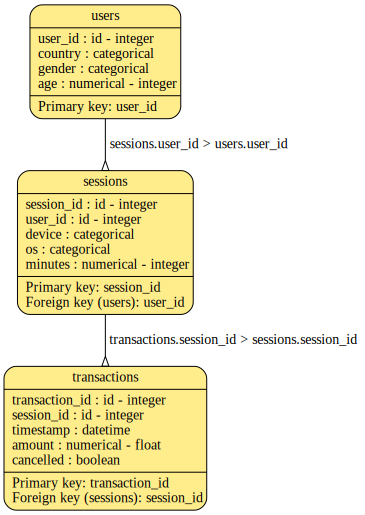

In [ ]:
metadata.visualize()

To work with more complex data **you must pass additional information about your data to SVD using Metadata**. In SDV, the structure of a dataset is represented using the class sdv.Metadata, which contains all the information that SDV needs in order to optimally learn the dataset and generate synthetic versions of it. 



# Building your own metadata


1.   First you import the class and create and empty instance
2.   Add parent table + specify primary key
3. Add childen table sessions, one by one
4. (Optional) add a table and specify field properties





In [ ]:
#1 import the class and create and empty instance

from sdv import Metadata

metadata = Metadata()

metadata

Metadata
  root_path: .
  tables: []
  relationships:

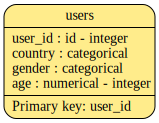

In [ ]:
# 2 parent table
metadata.add_table(name='users',
                   data=tables['users'],
                   primary_key='user_id')

metadata.visualize()

In [ ]:
# 3 add child table

metadata.add_table(
   name='sessions',
   data=tables['sessions'],
   primary_key='session_id',
   parent='users',
   foreign_key='user_id')

In [ ]:
# specify table properties 

transactions_fields = {'timestamp': {
   'type': 'datetime',
   'format': '%Y-%m-%d'
        }
   }

metadata.add_table(
    name='transactions',
    data=tables['transactions'],
    fields_metadata=transactions_fields,
    primary_key='transaction_id',
    parent='sessions'
)


# Fit the data



In [ ]:
from sdv import SDV
sdv = SDV()
sdv.fit(metadata, tables)


/usr/local/lib/python3.8/dist-packages/rdt/transformers/numerical.py:100: UserWarning: No rounding scheme detected for column '__sessions__user_id__univariates__device__loc'. Data will not be rounded.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/rdt/transformers/numerical.py:100: UserWarning: No rounding scheme detected for column '__sessions__user_id__univariates__os__loc'. Data will not be rounded.
  warnings.warn(


In [ ]:
sampled = sdv.sample_all(100)

/usr/local/lib/python3.8/dist-packages/sdv/relational/hma.py:371: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled[primary_key_name] = primary_key_values
/usr/local/lib/python3.8/dist-packages/sdv/relational/hma.py:400: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_rows[foreign_key] = parent_row[parent_key]


Sample_all is the method to start generating multiple rows, please note that only the parent tables of the dataset will have the specified number of rows, as the number of child rows that each row in the parent table has is also sampled following the original distribution of your dataset.

In [ ]:
print(sampled)

{'users':     user_id country gender  age
0         0      US      F   33
1         1      US      F   25
2         2      DE      F   39
3         3      ES      M   43
4         4      US    NaN   38
..      ...     ...    ...  ...
95       95      UK      F   24
96       96      ES      M   57
97       97      DE      M   37
98       98      US      F   28
99       99      FR      F   50

[100 rows x 4 columns], 'sessions':     session_id  user_id  device       os  minutes
0            0        0  tablet      ios       28
1            1        1  tablet  android       19
2            2        2  mobile      ios       26
3            3        3  mobile  android       29
4            4        4  tablet      ios       22
..         ...      ...     ...      ...      ...
95          95       95  tablet      ios       18
96          96       96  mobile      ios       11
97          97       97  tablet      ios       24
98          98       98  tablet      ios       25
99          99     

The data above is synthetic data. Afterwards we'd most likely share that data with some ML team that will perform/build a tool with it. 

To share the data with some other team, we use the save() method. This will generate a pkl file that does not include any of the data in it. To use this file, we must use the SDV.load() method, which samples from the new synthetic data.

# Saving the model 


In [ ]:
sdv.save('sdv.pkl')

In [ ]:
sdv.load('sdv.pkl')

In [ ]:
sampled = sdv.sample_all(5)

In [ ]:
print(sampled)

{'users':    user_id country gender  age
0      105      UK    NaN   38
1      106      UK      M   37
2      107      ES    NaN   46
3      108      UK      M   24
4      109      US      F   22, 'sessions':    session_id  user_id  device       os  minutes
0         105      105  tablet  android       23
1         106      106  tablet      ios       23
2         107      107  tablet  android       24
3         108      108  mobile      ios       25
4         109      109  tablet      ios       14, 'transactions':             timestamp  transaction_id  session_id  amount  cancelled
0 2019-01-06 05:07:24             105         105   109.6      False
1 2019-01-08 14:09:47             106         106    81.0      False
2 2019-01-16 19:09:14             107         107    79.7      False
3 2019-01-12 16:27:15             108         108   116.5       True
4 2019-01-22 01:58:37             109         109    73.5      False}
